In [1]:
import pandas as pd
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.phrases import Phrases, Phraser
import spacy
import string

import pyLDAvis
import pyLDAvis.gensim
from gensim.utils import lemmatize
from pprint import pprint
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [3]:
cnn = pd.read_csv("../data/cnn.csv")

In [4]:
cnn_abstract = cnn[['Abstract','Title']].dropna().reset_index(drop = True)

In [5]:
cnn_abstract.head()

,Abstract,Title
0,Incomplete surgical resection of head and neck...,The Use of Optical Coherence Tomography and Co...
1,We implement 2 different multitask learning (M...,Automatic extraction of cancer registry report...
2,Convolutional neural network (CNN) is employed...,Convolutional neural networks for the design a...
3,The purpose of the present study was to evalua...,Deep Learning-Based Deep Brain Stimulation Tar...
4,We apply convolutional neural network (CNN) mo...,Estimating PM2.5 concentration of the contermi...


In [6]:
stop_words = stopwords.words('english')
nlp = spacy.load('en', disable=['parser', 'ner'])
# clean the text using below for loop
clean_text = []
for index in range(len(cnn_abstract)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', cnn_abstract['Abstract'][index])

    #Convert to lowercase
    text = text.lower()
    
    #remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Convert to list of words from text
    text = text.split()
    
    # remove stop words after splitting text and joint the words
    text =[word for word in text if word not in stop_words]
    text = " ".join(text)
    # lemmatize words using spacy
    
    doc = nlp(text)
    text=" ".join([token.lemma_ for token in doc])

   # append to clean_text
    clean_text.append(text)
    
cnn_abstract['clean_text'] = clean_text

In [7]:
cnn_text = cnn_abstract[cnn_abstract.clean_text.str.contains('natural language processing|nlp')]

In [8]:
cnn_text.shape

(58, 3)

In [9]:
cnn_text.to_csv('../data/cnn_text.csv', index = False)

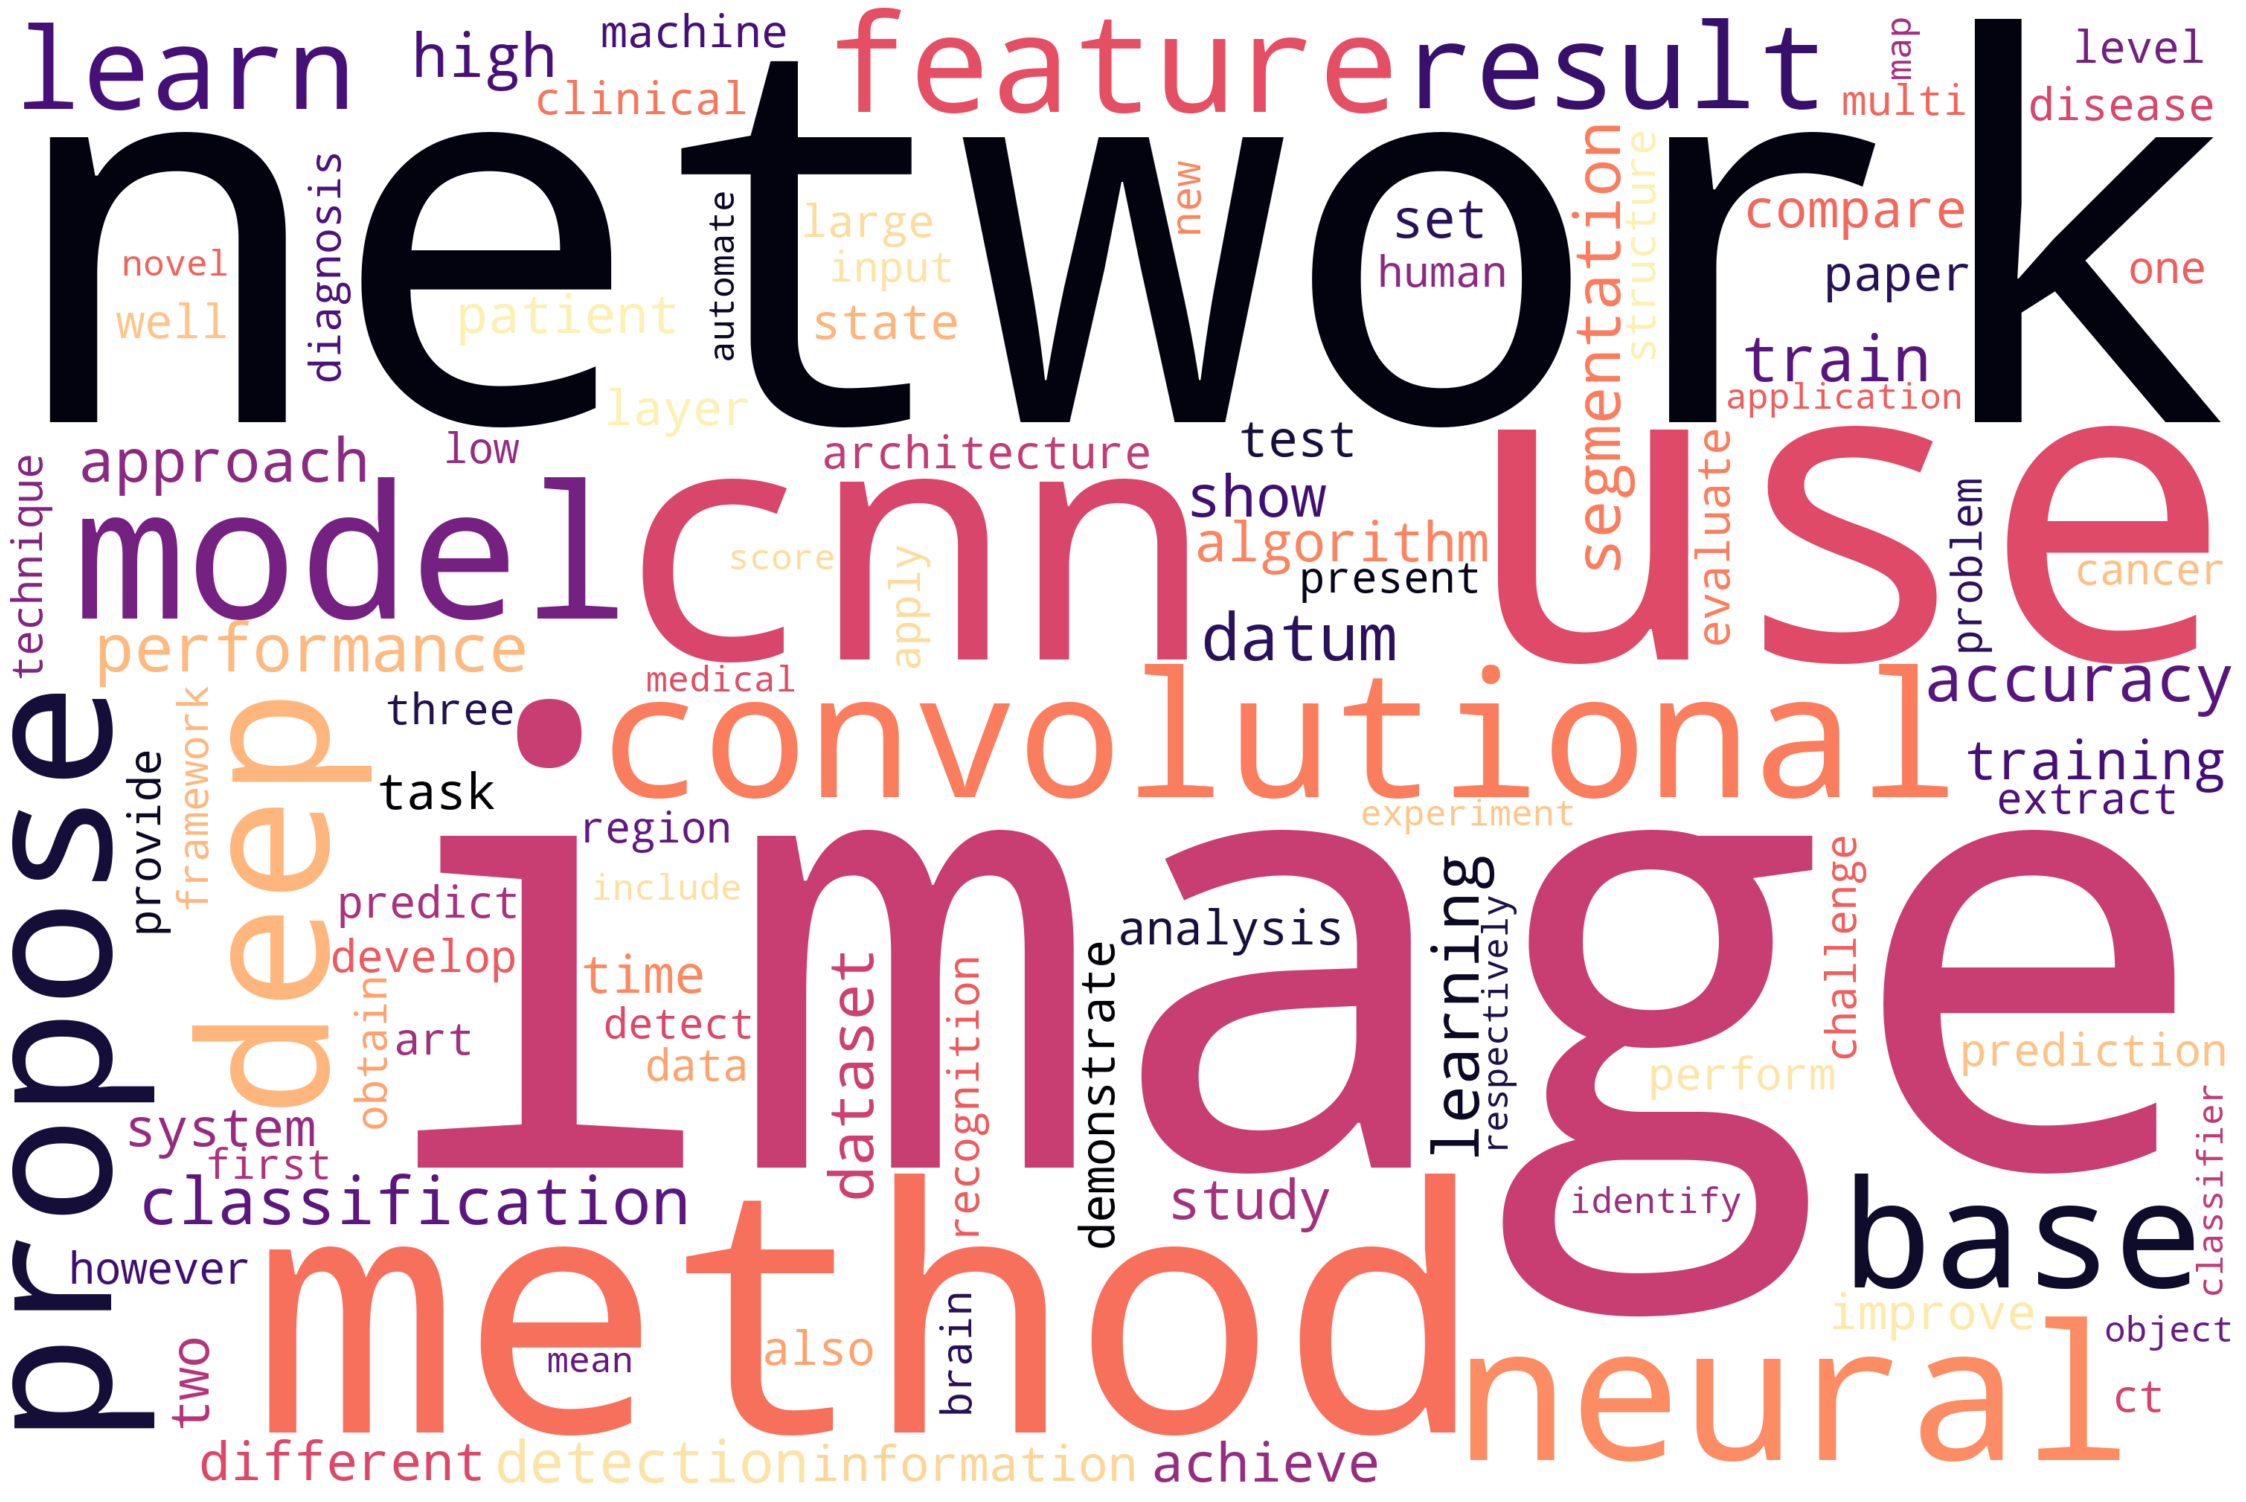

In [10]:
#Word cloud of 100 words in the entire clean text
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma,
                          stopwords=stop_words,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig("../data/word_cloud.png")
plt.show()

In [11]:
stop_words = stopwords.words('english')
print(len(stop_words))
remove_words = ['overall', 'perform','attempts', 'model','use', 'calculating','performance','trainable',
                'data','result','representations','using','limited','used','feature','proposed','evaluate'
                ,'performance','algorithm','lr','ext','respective','respectively', 'accuracy', 'relatively'
                ,'small','challenge','validation','layer','better','three','detection','show','cnn','li', 
                'small','show','development','training','transfer','twos','cnns','pre','auroc','two','method',
                'parameters','segmentation','convolutional', 'neural', 'network', 'show','task','compare',
                'state','study', 'retrospective', 'datum','prediction','art','require', 'focus', 'base',
                'approach', 'paper', 'present', 'fall', 'due', 'recent', 'exponential', 'increase','analysis',
                'analysis','specificity','basis', 'function', 'kernel', 'area', 'curve', 'auc', 'may', 
                'useful','explore', 'two', 'different','test','models','system','deep', 'learning',
                'approach','require','may', 'useful','information', 'basis','obtain','methods','achieve',
                'level','al', 'research', 'grid', 'also','features', 'techniques', 'hard', 'parameter', 
                'sharing', 'cross', 'stitch', 'train', 'word', 'level', 'however','search', 'currently',
                'trained','article','analytic','datasets','fold', 'cross', 'propose','compared','based',
                'classification','results','dataset','multiple', 'time','architecture','end', 'sensitivity', 
                'specificity','proive','representation','input','technique','large','work','improve','layers',
                'set','learn','experiment','achieved','information','machine','offers', 'high','networks',
                'superior', 'classification', 'accuracy', 'for', 'automated', 'coding', 'support', 'aid', 'address',
               'available','https','important','role', 'application','good','rate','field','new','tool',
               'subject','value','map','quality','application','provide','one','mr', 'false','positive','tune','fine',
                'github','com','precision','recall','long','short','gold', 'standard','problem','demonstrate','apply',
                'well','truth','ground','similarity','coefficient','entity','event','cohort','molecular','goal','knowledge',
                'refer','conditional','name','natural','language','metho','processing','nlp','term','operate',
                'characteristics', 'whole','slide','supplementary', 'significantly', 'improvement','wide','range',
               'hand','craft','open','source','ci','see','outperform']

#identifies and removes duplicates and returns a lits of words
remove_words= list(set(remove_words))
stop_words.extend(remove_words)
print(len(remove_words))
print(len(stop_words))

179
212
391


In [12]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
minus_stopwords = remove_stopwords(clean_text)

In [13]:
clean_text = [" ".join(x) for x in minus_stopwords]

In [14]:
def text_to_words(text):
    for sentence in text:
        yield(gensim.utils.simple_preprocess(str(sentence)))  # deacc=True removes punctuations

words_text = list(text_to_words(clean_text))

print(words_text[3])

['purpose', 'image', 'guide', 'surgical', 'planning', 'brain', 'stimulation', 'dbs', 'develop', 'semantic', 'dbs', 'targeting', 'prospectively', 'clinically', 'fast', 'gradient', 'echo', 'image', 'patient', 'manually', 'draw', 'prepare', 'subthalamic', 'red', 'nucleus', 'axial', 'cut', 'mm', 'anterior', 'posterior', 'commissure', 'line', 'fully', 'fcn', 'vgg', 'ensure', 'margin', 'identification', 'semantic', 'image', 'contrast', 'augmentation', 'nine', 'original', 'image', 'augment', 'image', 'semantic', 'measure', 'mean', 'mean', 'intersection', 'union', 'target', 'calculate', 'relative', 'distance', 'segment', 'anatomical', 'structure', 'consider', 'bejjani', 'target', 'mean', 'mean', 'intersection', 'union', 'image', 'augment', 'image', 'augment', 'image', 'dice', 'convert', 'intersection', 'union', 'image', 'semantic', 'adaptive', 'anatomical', 'variation', 'size', 'shape', 'asymmetry', 'clinical', 'patient', 'assess', 'essential', 'tremor', 'another', 'bradykinesia', 'gait', 'dis

In [15]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:
lemmatized_words = lemmatization(words_text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [17]:
#clean_text = [" ".join(x) for x in minus_stopwords]

                     Bigram       Freq
0             medical image  49.302650
1           computer vision  45.882403
2        magnetic resonance  42.392179
3             fully connect  34.928981
4   artificial intelligence  33.035519
5               image image  31.477178
6             breast cancer  31.263248
7                real world  30.084553
8           region interest  24.555475
9           resonance image  23.497497
10           fully automate  22.860524
11              image patch  20.609796
12              lung cancer  19.980433
13       object recognition  19.519009
14         ultrasound image  18.328160
15         tomography image  17.864603
16              brain tumor  17.230986
17       compute tomography  17.179575
18              multi scale  17.044189
19        image recognition  16.866614
20            random forest  16.679911
21     coherence tomography  16.353009
22         resolution image  16.302261
23             formula text  16.177518
24        optical coheren

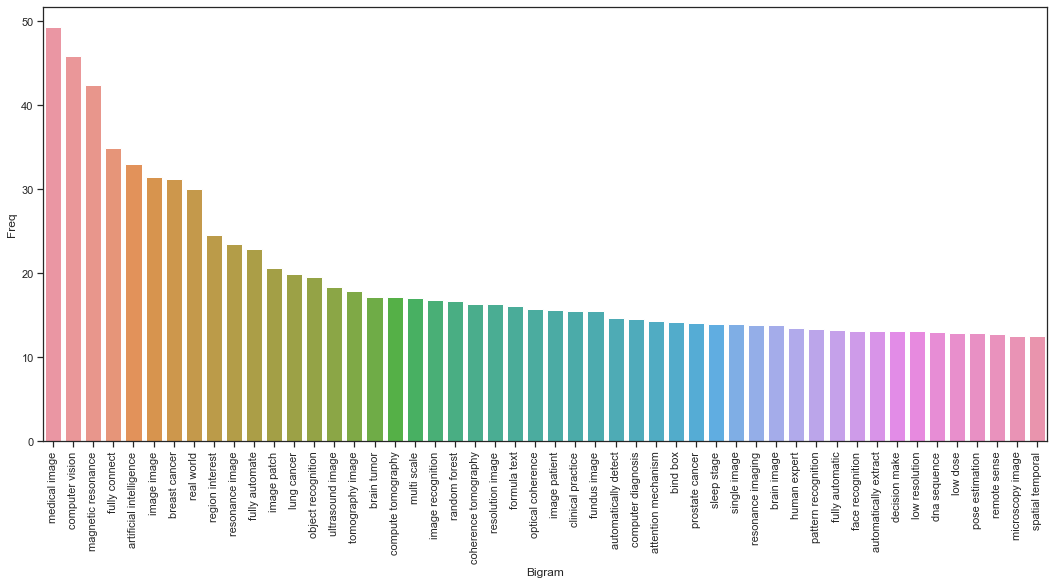

In [18]:
#Most frequently occuring bigrams in the data. plot both bar plot and word cloud of bigrams in the data 
def top_bi_grams(clean_text, n=None):
    clean_text = [" ".join(x) for x in lemmatized_words]
    vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df = 5,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_bigrams = top_bi_grams(clean_text, n=50)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigram", "Freq"]
print(top_bigrams_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

h=sns.barplot(x="Bigram", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90);

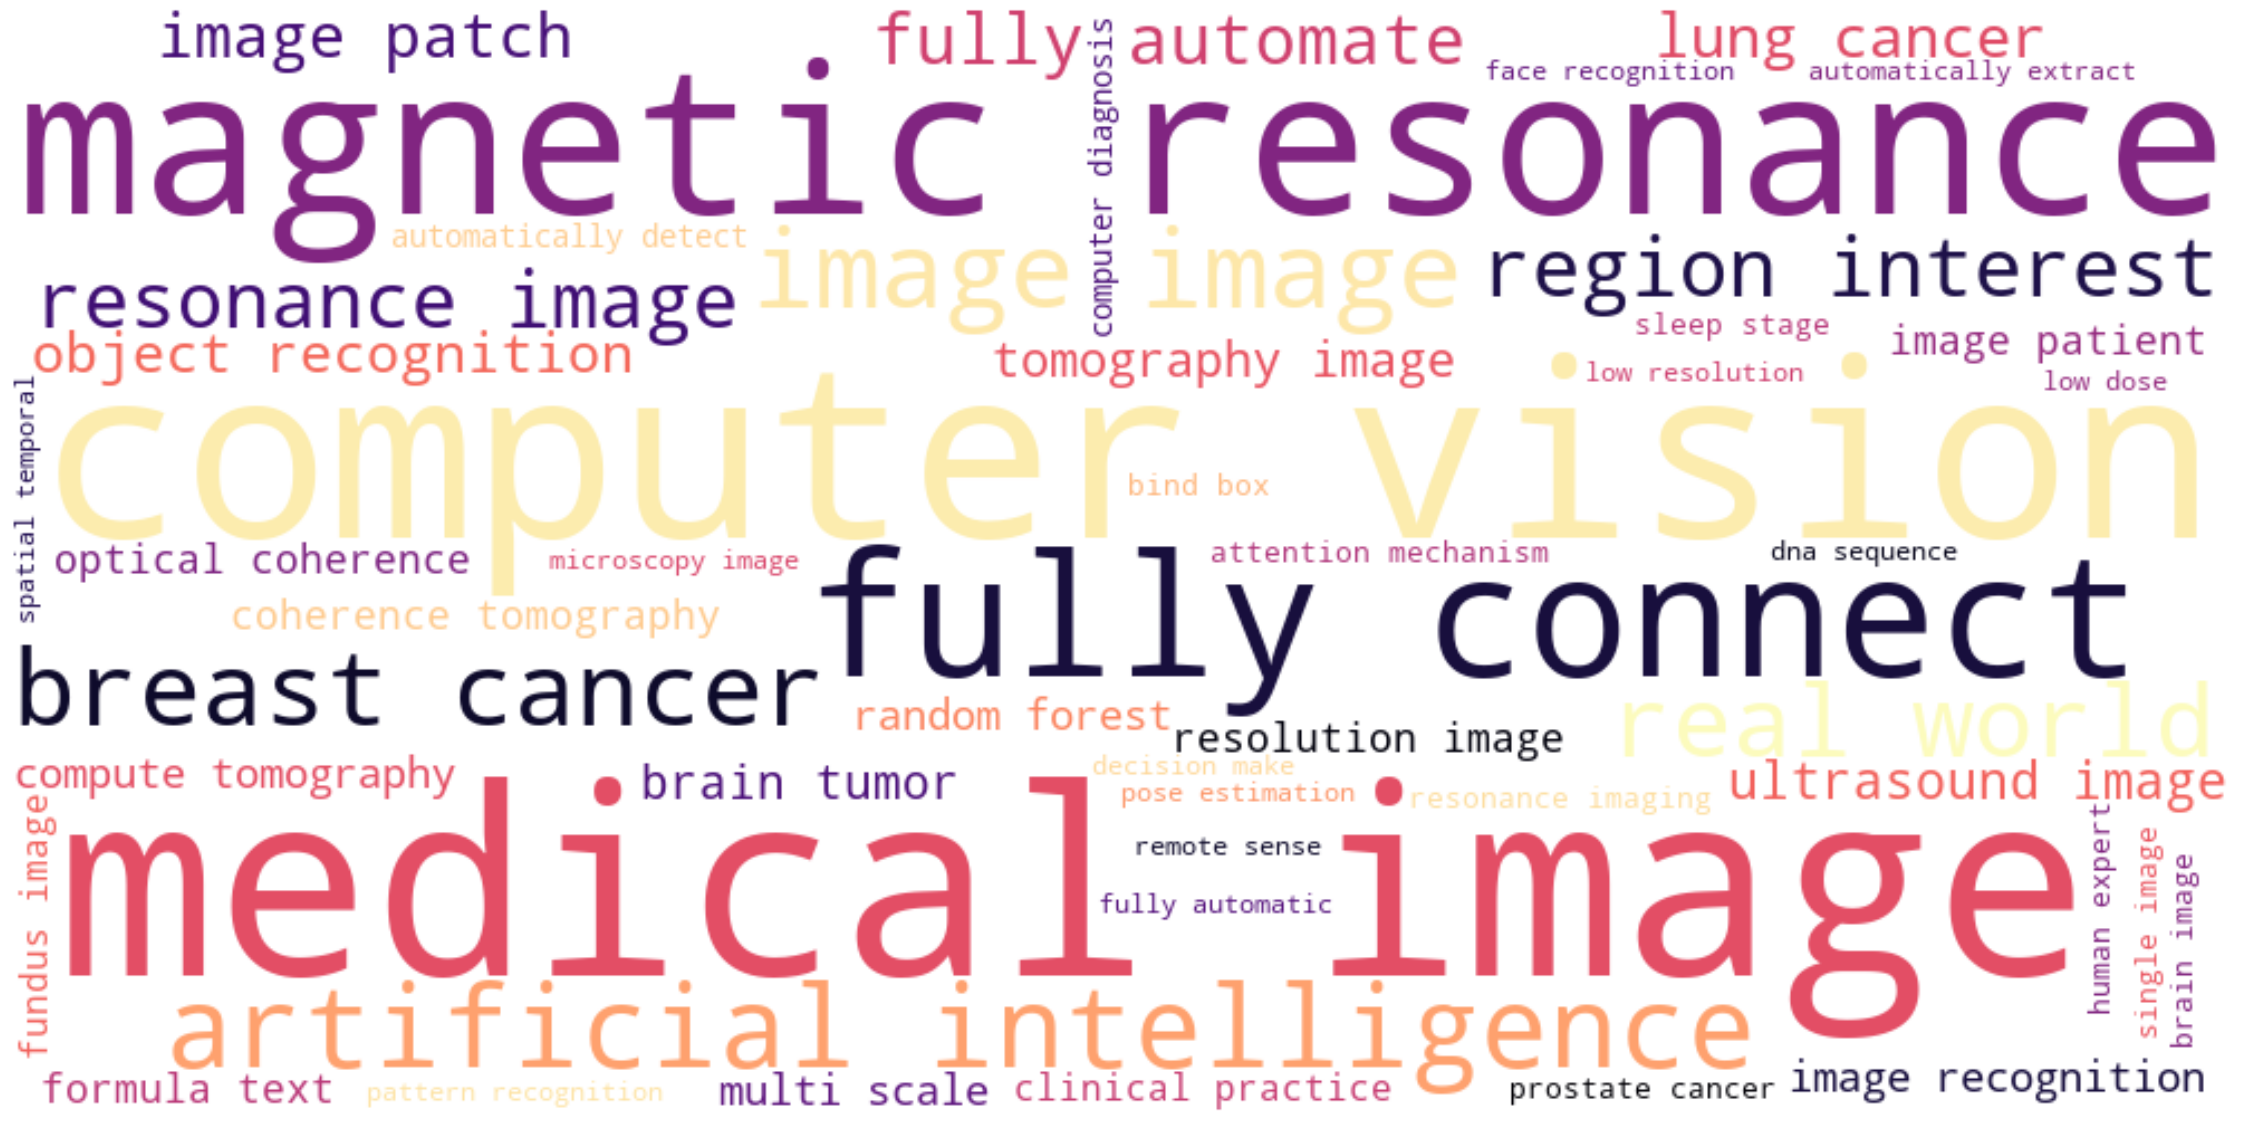

In [20]:
bigrams = {}
for w, x in top_bigrams_df.values:
    bigrams[w] = x
wordcloud = WordCloud(width = 1000,
    height = 500,background_color='white',colormap=plt.cm.magma,margin=5,
                      relative_scaling=1, collocations=False)
wordcloud.generate_from_frequencies(bigrams)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("../data/word_cloud_cnn.png", bbox_inches='tight')
plt.show()

In [21]:
bigram = Phrases(lemmatized_words, min_count=1, threshold=100)
trigram = Phrases(lemmatized_words, min_count=1, threshold=100)
bigrams_mod = Phraser(bigram)
trigrams_mod = Phraser(trigram)

In [22]:
def bigrams(texts):
    return [bigrams_mod[doc] for doc in texts]
words_bigrams = bigrams(lemmatized_words)

def trigrams(texts):
    return [trigrams_mod[doc] for doc in texts]
words_trigrams = trigrams(lemmatized_words)

In [ ]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [ ]:
#data_lemme = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [23]:
# Create Dictionary
id2word = corpora.Dictionary(words_bigrams)


# Create Corpus
texts = words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(7, 2), (13, 2), (60, 1), (61, 1), (62, 4), (63, 1), (64, 1), (65, 5), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 2), (72, 2), (73, 1), (74, 5), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 3), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 3), (98, 2), (99, 1), (100, 1), (101, 4), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1),

In [24]:
id2word[21]

'image'

In [25]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=14, 
                     random_state=100,
                     update_every=1,
                     chunksize=1000,
                     passes=25,
                     alpha='auto',
                     per_word_topics=True)

In [26]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"patient" + 0.025*"clinical" + 0.015*"identify" + 0.015*"predict" + '
  '0.014*"assessment" + 0.014*"individual" + 0.014*"risk" + 0.013*"record" + '
  '0.013*"year" + 0.013*"age"'),
 (1,
  '0.029*"plant" + 0.027*"disease" + 0.025*"drug" + 0.017*"fast" + '
  '0.017*"glaucoma" + 0.017*"crop" + 0.015*"proposal" + 0.015*"co" + '
  '0.013*"convnet" + 0.011*"detect"'),
 (2,
  '0.036*"sequence" + 0.023*"protein" + 0.022*"predict" + 0.017*"structure" + '
  '0.009*"recurrent" + 0.009*"pattern" + 0.009*"interaction" + '
  '0.009*"saliency" + 0.008*"target" + 0.008*"identify"'),
 (3,
  '0.044*"spectral" + 0.032*"polyp" + 0.024*"coronary_artery" + '
  '0.015*"remote_sense" + 0.014*"satellite" + 0.014*"hyperspectral" + '
  '0.014*"band" + 0.014*"phenotype" + 0.013*"learn" + 0.012*"urban"'),
 (4,
  '0.066*"image" + 0.007*"first" + 0.006*"low" + 0.006*"region" + '
  '0.006*"extract" + 0.006*"design" + 0.005*"number" + 0.005*"scale" + '
  '0.005*"sample" + 0.005*"generate"'),
 (5,
  '0.0

In [27]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.546889672069172

Coherence Score:  0.46285978371760644


In [28]:
# code repurposed from https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

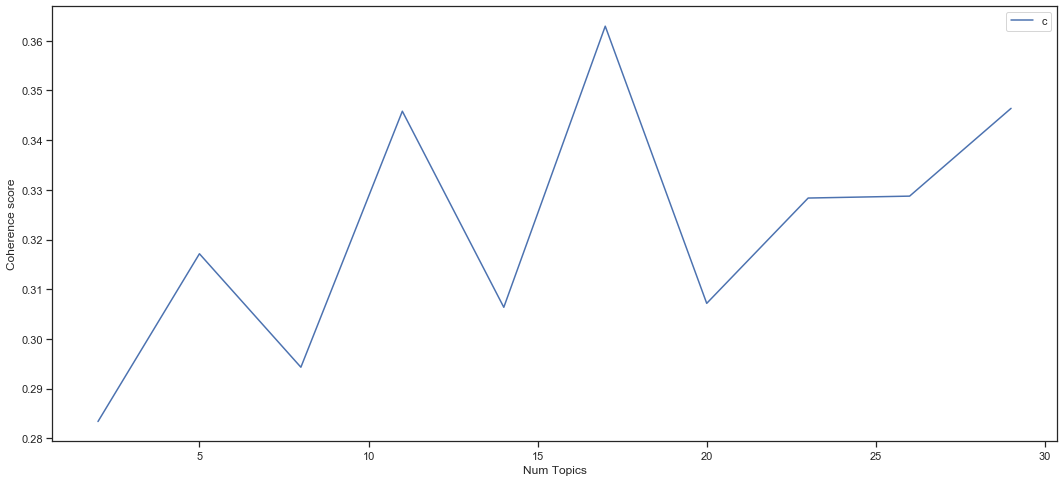

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigrams, start=2, limit=30, step=3)
# Show graph

limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.250356  0.046768       1        1  48.107689
11     0.164108 -0.206992       2        1   9.802444
5      0.133328 -0.236399       3        1   8.193620
2      0.174524  0.093191       4        1   7.663223
12     0.135420  0.167254       5        1   7.233589
0      0.067300 -0.230839       6        1   4.208524
10     0.094237  0.199844       7        1   3.993250
9      0.082558  0.131460       8        1   3.645307
7     -0.080586  0.070540       9        1   2.395016
1     -0.145431 -0.032678      10        1   1.370338
13    -0.175415  0.023369      11        1   1.117308
8     -0.229898 -0.014157      12        1   0.878333
3     -0.243731  0.004975      13        1   0.706080
6     -0.226769 -0.016337      14        1   0.685276, topic_info=     Category          Freq         Term         Total  loglift  logprob
21    Default  10464.000000        image  10464.000000  30.0000  30.0000
1806  Default   1211.000000  recognition   1211.000000  29.0000  29.0000
115   Default    686.000000         cell    686.000000  28.0000  28.0000
188   Default   1451.000000      patient   1451.000000  27.0000  27.0000
335   Default   1206.000000       object   1206.000000  26.0000  26.0000
...       ...           ...          ...           ...      ...      ...
216   Topic14     16.887417   estimation    264.286713   2.2326  -4.7482
215   Topic14     12.698766     estimate    339.384857   1.6975  -5.0333
606   Topic14     12.082968         year    361.226746   1.5854  -5.0830
10    Topic14     10.734050   difference    388.388367   1.3945  -5.2014
67    Topic14      9.490453         code    193.185257   1.9697  -5.3245

[799 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1749      1  0.008356     abdominal
1749      3  0.985989     abdominal
1307      8  0.870772      abstract
1307     10  0.096752      abstract
5910      5  0.978082  acceleration
...     ...       ...           ...
606       4  0.008305          year
606       5  0.038757          year
606       6  0.434630          year
606      14  0.033220          year
3083     14  0.901533      year_old

[1512 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 12, 6, 3, 13, 1, 11, 10, 8, 2, 14, 9, 4, 7])

In [31]:
pyLDAvis.save_html(vis, '../data/lda.html')